In [17]:
# import neessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import DBSCAN

In [18]:
df_wind_to_append = []

# Load and append data for each farm
for farm in [1, 2, 3, 4, 5]:
    
    wind_to_append = pd.read_csv(f"../data/wind/enlitia_wind_farm_{farm}_data.csv")
    wind_to_append['farm'] = farm  # Add a 'farm' column with the farm number
    df_wind_to_append.append(wind_to_append)

# Concatenate the DataFrames and reset index
df_wind = pd.concat(df_wind_to_append, ignore_index=True)

print("Wind DataFrame:\n", df_wind.head(),"\n")


Wind DataFrame:
    asset_id              read_at  wind_speed  wind_direction  power_average  \
0        11  2021-01-01 00:00:00         8.3           296.0          802.0   
1        11  2021-01-01 00:10:00         8.9           306.0          832.0   
2        11  2021-01-01 00:20:00         8.1           298.0          666.0   
3        11  2021-01-01 00:30:00         7.9           298.0          541.0   
4        11  2021-01-01 00:40:00         8.1           296.0          625.0   

   rotation_average  exterior_temperature  nacelle_temperature  farm  
0             15.51                  -2.0                  9.0     1  
1             15.74                  -2.0                  9.0     1  
2             14.88                  -2.0                 10.0     1  
3             14.03                  -2.0                 10.0     1  
4             14.64                  -2.0                 10.0     1   



In [19]:
df_wind.to_csv("intermediate/wind/df_wind.csv")

In [20]:
df_wind.describe()

,asset_id,wind_speed,wind_direction,power_average,rotation_average,exterior_temperature,nacelle_temperature,farm
count,8.367759e+06,8.367759e+06,8.367759e+06,8.367759e+06,8.367759e+06,8.367758e+06,8.367758e+06,8.367759e+06
mean,1.297044e+02,6.146998e+00,1.008878e+02,5.743852e+02,1.100961e+01,1.243242e+01,2.140831e+01,2.929581e+00
std,1.504828e+02,3.270634e+00,3.020807e+02,6.570261e+02,4.684451e+00,7.089474e+00,8.012069e+00,1.407463e+00
min,1.100000e+01,-8.970000e+00,-1.070000e+03,-1.818000e+01,0.000000e+00,-4.499000e+01,-3.789000e+01,1.000000e+00
25%,2.900000e+01,3.800000e+00,-1.090000e+02,6.700000e+01,7.790000e+00,7.000000e+00,1.600000e+01,2.000000e+00
50%,4.900000e+01,5.700000e+00,1.150000e+02,2.890000e+02,1.118000e+01,1.102000e+01,2.100000e+01,3.000000e+00
75%,2.100000e+02,8.000000e+00,3.140000e+02,8.800000e+02,1.487000e+01,1.700000e+01,2.700000e+01,4.000000e+00
max,5.120000e+02,3.270000e+01,1.058000e+03,2.366000e+03,1.880000e+01,1.170000e+02,1.240000e+02,5.000000e+00


In [21]:
print(f"NAs count for Wind")
print(df_wind.isna().sum(), "\n")

NAs count for Wind
asset_id                0
read_at                 0
wind_speed              0
wind_direction          0
power_average           0
rotation_average        0
exterior_temperature    1
nacelle_temperature     1
farm                    0
dtype: int64 



In [22]:
df_wind[df_wind["exterior_temperature"].isna()]

,asset_id,read_at,wind_speed,wind_direction,power_average,rotation_average,exterior_temperature,nacelle_temperature,farm
1043621,19,2022-12-01 21:00:00,12.5,-273.0,1962.0,17.8,NaN,NaN,1


#### Fill NA's

Fill NA's with the median of the median of the values for the same day and month at the same time, for the same asset. 

In [23]:
df_wind['read_at'] = pd.to_datetime(df_wind['read_at'])
filtered_df = df_wind[(df_wind['asset_id'] == 19) & 
                 (df_wind['read_at'].dt.time == pd.to_datetime('21:00:00').time()) & 
                 (df_wind['read_at'].dt.month == 12) & 
                 (df_wind['read_at'].dt.day == 1)] 
filtered_df

,asset_id,read_at,wind_speed,wind_direction,power_average,rotation_average,exterior_temperature,nacelle_temperature,farm
991062,19,2021-12-01 21:00:00,12.0,-52.0,2047.0,17.97,2.0,5.0,1
1043621,19,2022-12-01 21:00:00,12.5,-273.0,1962.0,17.80,NaN,NaN,1


In [24]:
df_wind.loc[df_wind["exterior_temperature"].isna(), "exterior_temperature"] = filtered_df["exterior_temperature"].median()
df_wind.loc[df_wind["nacelle_temperature"].isna(), "nacelle_temperature"] = filtered_df["nacelle_temperature"].median()

In [25]:
df_wind[(df_wind['asset_id'] == 19) & 
                 (df_wind['read_at'].dt.time == pd.to_datetime('21:00:00').time()) & 
                 (df_wind['read_at'].dt.month == 12) & 
                 (df_wind['read_at'].dt.day == 1)] 

,asset_id,read_at,wind_speed,wind_direction,power_average,rotation_average,exterior_temperature,nacelle_temperature,farm
991062,19,2021-12-01 21:00:00,12.0,-52.0,2047.0,17.97,2.0,5.0,1
1043621,19,2022-12-01 21:00:00,12.5,-273.0,1962.0,17.80,2.0,5.0,1


In [26]:
print(f"Duplicated values for the Wind df: {df_wind[df_wind.duplicated()]}")

Duplicated values for the Wind df: Empty DataFrame
Columns: [asset_id, read_at, wind_speed, wind_direction, power_average, rotation_average, exterior_temperature, nacelle_temperature, farm]
Index: []


### Check multicolinearity

In [27]:
filtered_df_wind = df_wind.iloc[:, 2:-1]
print(filtered_df_wind.columns)

filtered_df_wind.to_csv("intermediate/wind/filtered_df_wind.csv")

Index(['wind_speed', 'wind_direction', 'power_average', 'rotation_average',
       'exterior_temperature', 'nacelle_temperature'],
      dtype='object')


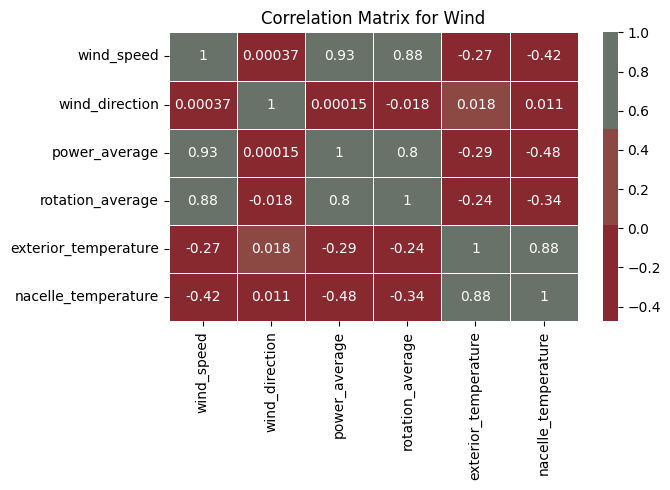

In [35]:
# Calculate the correlation matrix
my_colors = ['#88292F', '#8C4843', '#697268']
sns.set_palette(my_colors)


corr_matrix = filtered_df_wind.corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(7, 5))
sns.heatmap(corr_matrix, annot=True, cmap=my_colors, linewidths=0.5)
plt.title(f'Correlation Matrix for Wind')
plt.tight_layout()
plt.show()

explore wind speed vs power average;

Also explore wind exterior temperature vs power average

NOTE: A nacelle is a cover housing that houses all of the generating components in a wind turbine, including the generator, gearbox, drive train, and brake assembly.

# Outliers


Boxplots for the Wind df:


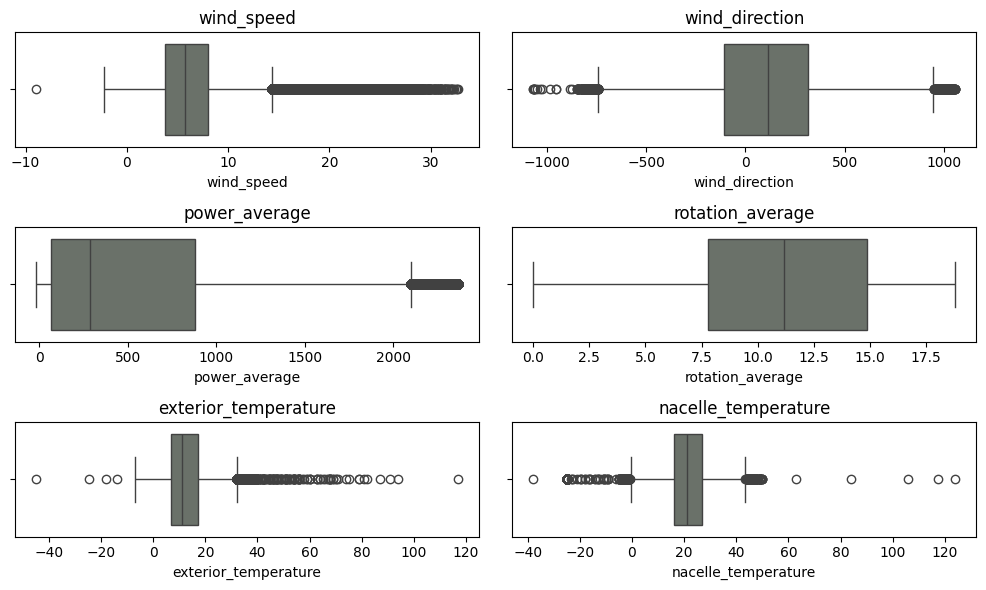

In [29]:

print(f"\nBoxplots for the Wind df:")
num_cols = len(filtered_df_wind.columns)
num_rows = (num_cols + 1) // 2  
fig, axes = plt.subplots(num_rows, 2, figsize=(10, num_rows*2))

axes = axes.flatten()

for i, feature in enumerate(filtered_df_wind.columns):
    if i < num_cols:  
        sns.boxplot(x=filtered_df_wind[feature], color='#697268', ax=axes[i])
        axes[i].set_title(feature)  
plt.tight_layout() 
plt.show()


wind speed vs power average

exterior temperature vs power average

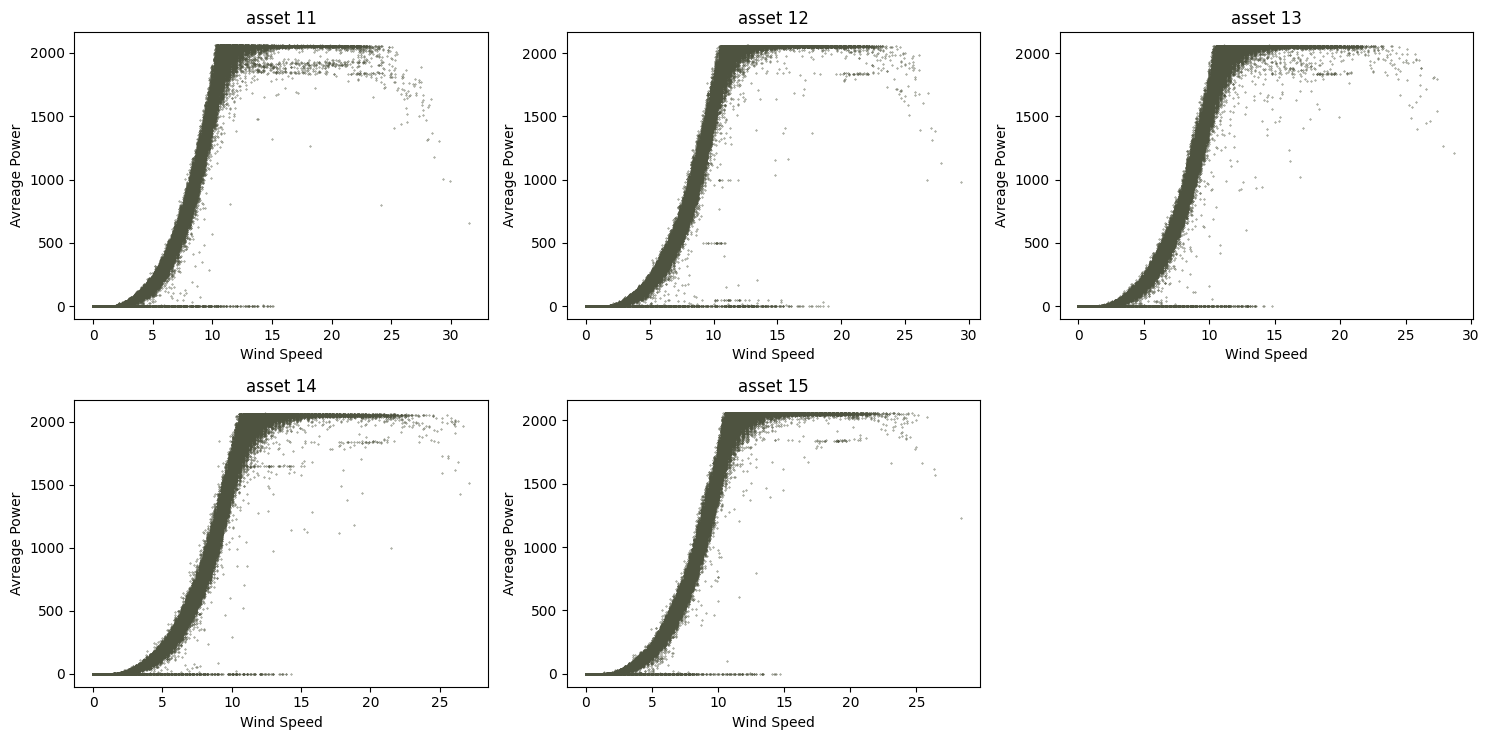

In [36]:
plot = 1
assets = df_wind["asset_id"].unique()[:5]
n_plots = 5
plt.figure(figsize=(n_plots*3, n_plots*1.5))
for asset, subset in df_wind[df_wind["asset_id"].isin(assets)].groupby("asset_id"):
    plt.subplot(2, 3, plot)
    plt.title(f"asset {asset}")
    plt.xlabel('Wind Speed')
    plt.ylabel('Avreage Power')
    plt.scatter(subset["wind_speed"], subset["power_average"], c="#4E5340", s=0.1)
    plot += 1
plt.tight_layout()
plt.show()

test the DBSCAN method to identify outliers:

Number of outliers for Asset 11: 2815
Number of outliers for Asset 12: 2189
Number of outliers for Asset 13: 2544
Number of outliers for Asset 14: 2287
Number of outliers for Asset 15: 2021


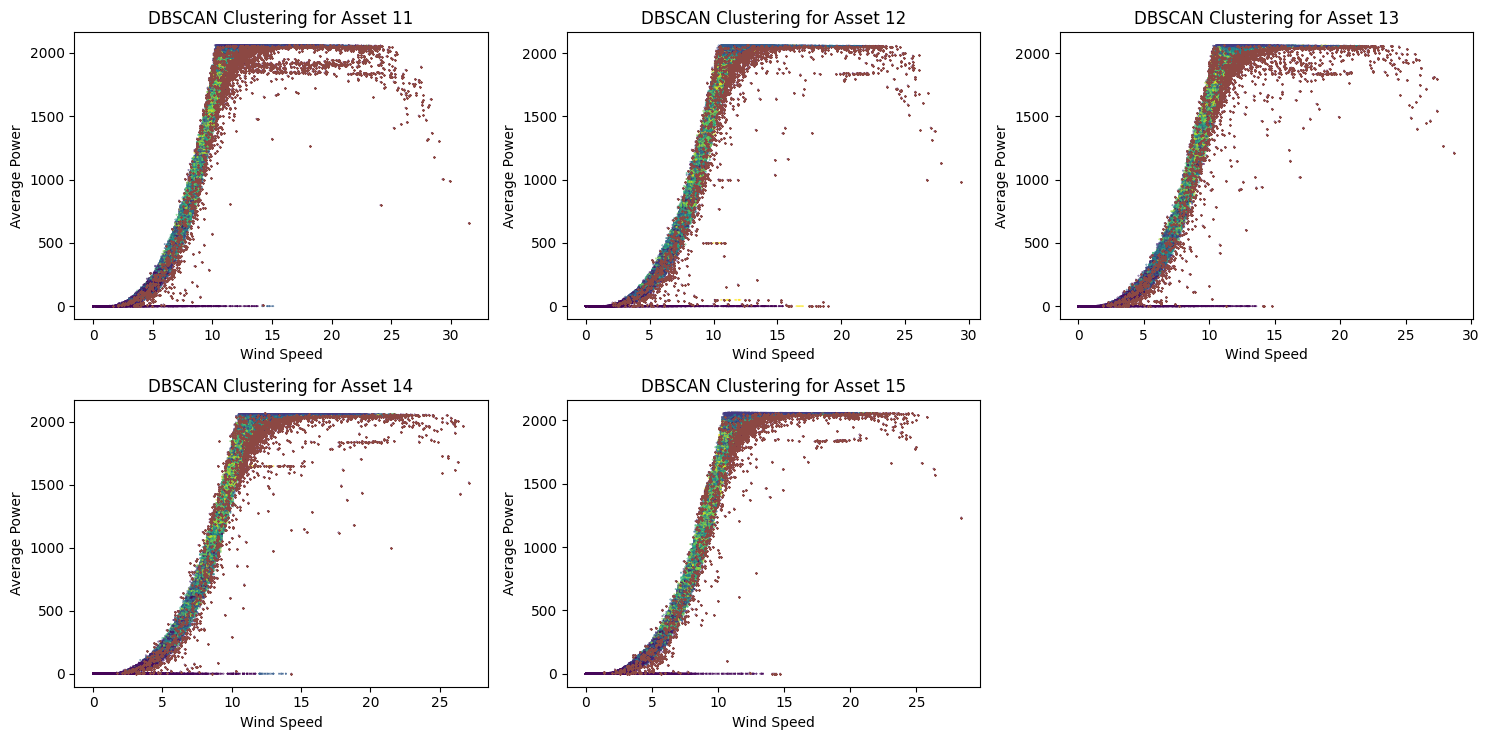

In [37]:
# Define the DBSCAN parameters
eps = 0.3
min_samples = 5

n_plots = 5

plt.figure(figsize=(n_plots*3, n_plots*1.5))

# Iterate over the first 5 assets
for plot, asset_id in enumerate(df_wind['asset_id'].unique()[:n_plots], start=1):
    # Filter the data for the current asset
    filtered_data = df_wind[df_wind['asset_id'] == asset_id][['wind_speed', 'power_average']]

    # Create the DBSCAN model
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)

    # Fit the model to the data
    dbscan.fit(filtered_data)

    # Get the labels of the data points
    labels = dbscan.labels_

    # Identify the outliers
    outliers = np.where(labels == -1)[0]

    # Print the number of outliers
    print(f"Number of outliers for Asset {asset_id}:", len(outliers))

    plt.subplot(2, 3, plot)

    # Plot the data with the outliers highlighted
    plt.scatter(filtered_data['wind_speed'], filtered_data['power_average'], c=labels, label = "Remaining Points" , s=0.1)
    plt.scatter(filtered_data.iloc[outliers, 0], filtered_data.iloc[outliers, 1], c="#8C4843", marker="x", label = "Outlier",s=1)
    plt.title(f'DBSCAN Clustering for Asset {asset_id}')
    plt.xlabel('Wind Speed')
    plt.ylabel('Average Power')

# Adjust layout and show plot
plt.tight_layout()
plt.show()



Mean square deviation method:

/tmp/ipykernel_5315/768388249.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_df = df_wind.groupby([wind_speed_intervals, "asset_id"])
/tmp/ipykernel_5315/768388249.py:16: RuntimeWarning: invalid value encountered in scalar divide
  mean_square_deviation = np.sqrt(((group_df['power_average'] - mean_power) ** 2).sum() / (n - 1))


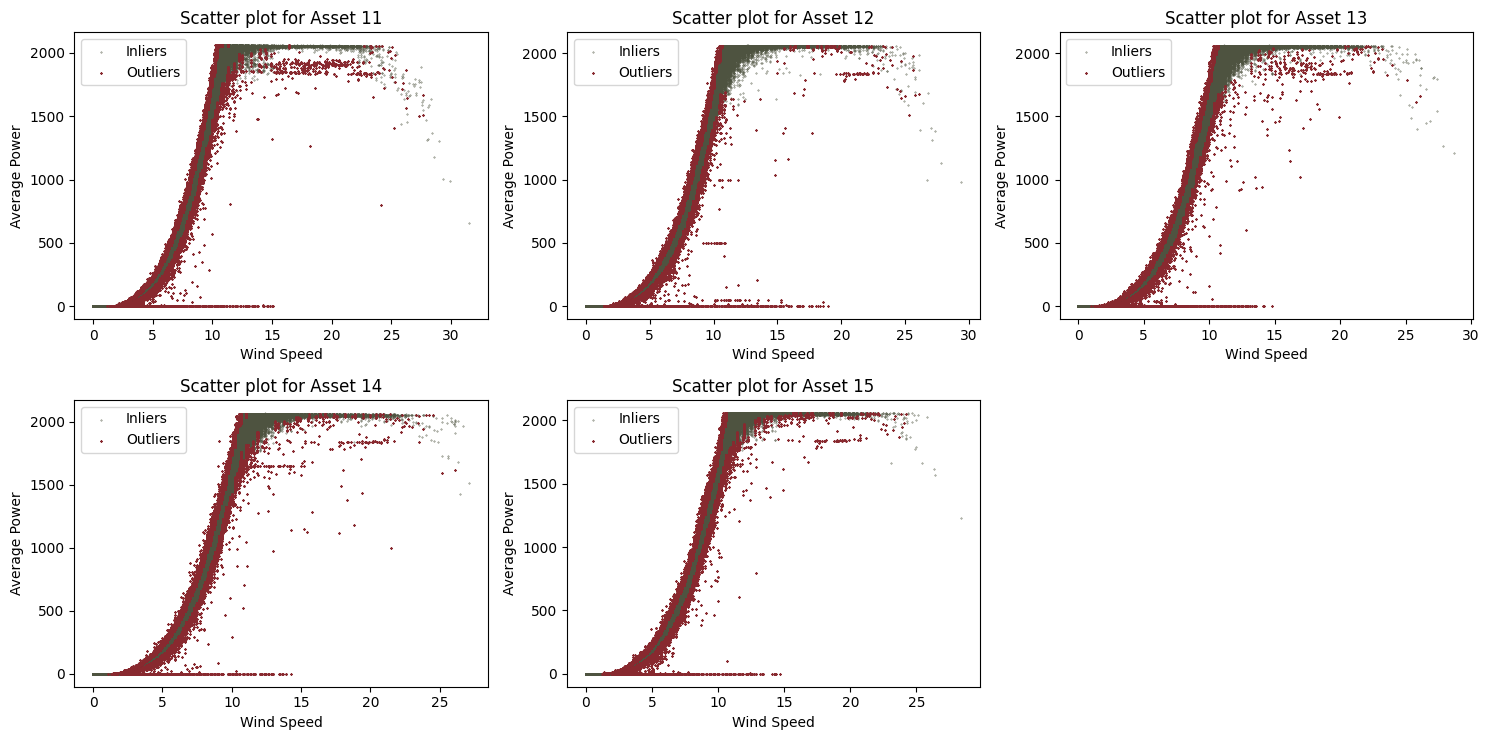

In [38]:
# Create an empty list to store outliers for each asset
outliers_list = []

n_plots = 5

plt.figure(figsize=(n_plots*3, n_plots*1.5))

# Group the data by wind speed intervals
wind_speed_intervals = pd.cut(df_wind['wind_speed'], bins=np.arange(0, df_wind['wind_speed'].max() + 0.1, 0.1))
grouped_df = df_wind.groupby([wind_speed_intervals, "asset_id"])

for (wind_speed_interval, asset_id), group_df in grouped_df:
    # Calculate mean power and within-group mean square deviation
    mean_power = group_df['power_average'].mean()
    n = len(group_df)
    mean_square_deviation = np.sqrt(((group_df['power_average'] - mean_power) ** 2).sum() / (n - 1))
    
    # Select the mean square deviation multiplier
    mean_sq_dev_multiplier = 1
    
    # Threshold for identifying outliers
    threshold = mean_sq_dev_multiplier * mean_square_deviation

    # Filter out outliers
    outliers = group_df[(group_df['power_average'] - mean_power).abs() > threshold]

    # Append outliers for each asset to the outliers list
    outliers_list.append(outliers)

# Plot the data points with outliers in a different color
inliers_df = df_wind.drop(pd.concat(outliers_list).index)

# Iterate over the first 5 assets
for i, asset_id in enumerate(assets, 1):
    plt.subplot(2, 3, i)
    asset_inliers = inliers_df[inliers_df["asset_id"] == asset_id]
    asset_outliers = pd.concat([outliers[outliers["asset_id"] == asset_id] for outliers in outliers_list])
    
    plt.scatter(asset_inliers["wind_speed"], asset_inliers["power_average"], c="#4E5340", s=0.1)
    plt.scatter(asset_outliers["wind_speed"], asset_outliers["power_average"], c="#88292F", s=1, marker="x")
    
    plt.title(f'Scatter plot for Asset {asset_id}')
    plt.xlabel('Wind Speed')
    plt.ylabel('Average Power')
    plt.legend(['Inliers', 'Outliers'])

# Adjust layout and show plot
plt.tight_layout()
plt.show()


